## EDA ON IMDB DATA SET

### import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
import os

In [3]:
os.chdir("C:\\Users\\m\\Desktop\\project")

In [4]:
os.listdir()

['final-checkpoint.ipynb',
 'final.ipynb',
 'imdb.pptx',
 'mysar ahmad bhat batch no 91 project on imdb.zip',
 'regex_imdb-checkpoint.ipynb',
 'regex_imdb.csv',
 'regex_imdb.ipynb',
 'snaps',
 'web_scraped_imdb.csv',
 'web_scrapping-checkpoint.ipynb',
 'web_scrapping.ipynb',
 '~$imdb.pptx']

### import the csv file

In [5]:
df=pd.read_csv("C:\\Users\\m\\Desktop\\project\\regex_imdb.csv")

### 01. Get the basic information about the data set

In [6]:
df.head()

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80.0,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100.0,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97
2,The Dark Knight,2008,"Action, Crime, Drama",152,9.0,84.0,2341261,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86
3,The Godfather: Part II,1974,"Crime, Drama",202,9.0,90.0,1146666,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",57.30
4,12 Angry Men,1957,"Crime, Drama",96,9.0,96.0,701882,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",4.36


In [7]:
df.dtypes

Name           object
Year            int64
Genre          object
Run_time        int64
Rating        float64
Meta_score    float64
Votes           int64
Director       object
cast           object
Gross         float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1000 non-null   object 
 1   Year        1000 non-null   int64  
 2   Genre       1000 non-null   object 
 3   Run_time    1000 non-null   int64  
 4   Rating      1000 non-null   float64
 5   Meta_score  772 non-null    float64
 6   Votes       1000 non-null   int64  
 7   Director    998 non-null    object 
 8   cast        1000 non-null   object 
 9   Gross       830 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 62.6+ KB


In [9]:
df.dtypes

Name           object
Year            int64
Genre          object
Run_time        int64
Rating        float64
Meta_score    float64
Votes           int64
Director       object
cast           object
Gross         float64
dtype: object

### 02. Check the null values

In [10]:
print("Percentage Of Missing Values")
Perc_Of_Missing_Values=df.isna().sum()/len(df)*100
Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]

Percentage Of Missing Values


Meta_score    22.8
Director       0.2
Gross         17.0
dtype: float64

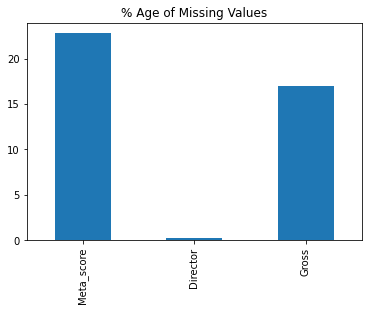

In [11]:
only_missing=Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]
only_missing.plot(kind="bar")
plt.title("% Age of Missing Values")
plt.show()

#### As we can see 22% of meta-score values are null values & 17% of gross values are null values! . Also some of the values are missing in the director column as well

#### so we will impute the missing values of meta-score and gross-value

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [12]:
df["Meta_score"]=df["Meta_score"].fillna(df["Meta_score"].median())

In [13]:
import numpy as np

In [14]:
df["Meta_score"]=df["Meta_score"].apply(np.round)

In [15]:
df["Gross"]=df["Gross"].fillna(df["Gross"].median())

In [16]:
#df["Gross"]=df["Gross"].apply(np.round,decimals=2)

In [17]:
df["Director"]=df["Director"].fillna(df["Director"].mode()[0])

In [18]:
df.isna().sum()

Name          0
Year          0
Genre         0
Run_time      0
Rating        0
Meta_score    0
Votes         0
Director      0
cast          0
Gross         0
dtype: int64

#### check the data types and change them

In [30]:
df.dtypes

Name           object
Year            int64
Genre          object
Run_time        int64
Rating        float64
Meta_score    float64
Votes           int64
Director       object
cast           object
Gross         float64
dtype: object

#### meta-score data type is float lets change it to integer

In [31]:
df["Meta_score"]=df["Meta_score"].astype("int")

In [32]:
df.dtypes

Name           object
Year            int64
Genre          object
Run_time        int64
Rating        float64
Meta_score      int32
Votes           int64
Director       object
cast           object
Gross         float64
dtype: object

##  03.Now let's do some analysis

##  i) Univariate

In [33]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Run_time'>

Text(0.5, 1.0, 'Distplot with Normal distribution for run time')

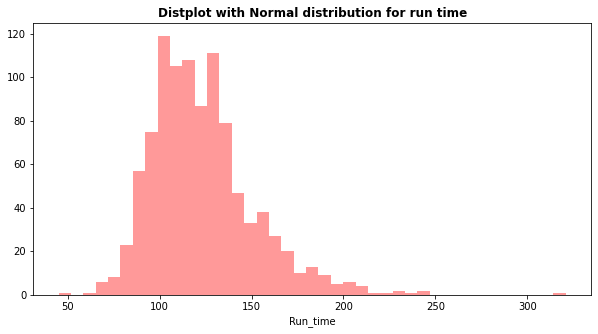

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(df['Run_time'],kde=False, color=['red'])
plt.title('Distplot with Normal distribution for run time',fontweight="bold")
plt.show()

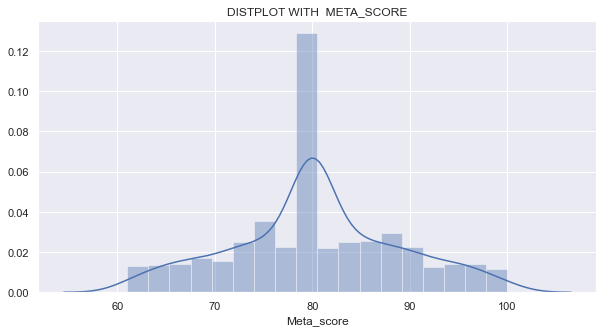

In [132]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.distplot(df["Meta_score"])
plt.title("DISTPLOT WITH  META_SCORE")
plt.show()

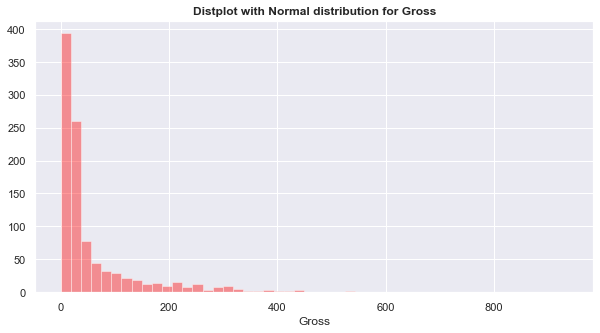

In [133]:
plt.figure(figsize=(10,5))
sns.distplot(df['Gross'],kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Gross',fontweight="bold")
plt.show()

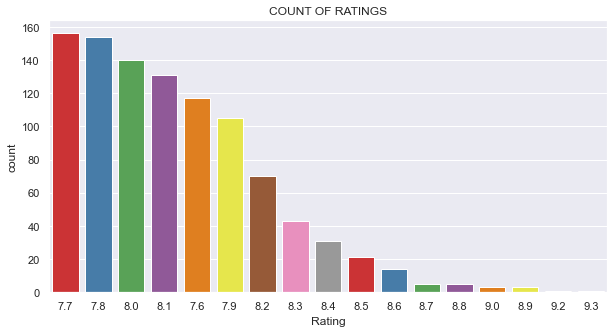

In [134]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
px = sns.countplot(x="Rating", data=df,palette="Set1",  order=df['Rating'].value_counts().index[0:])
plt.title("COUNT OF RATINGS")
plt.show()

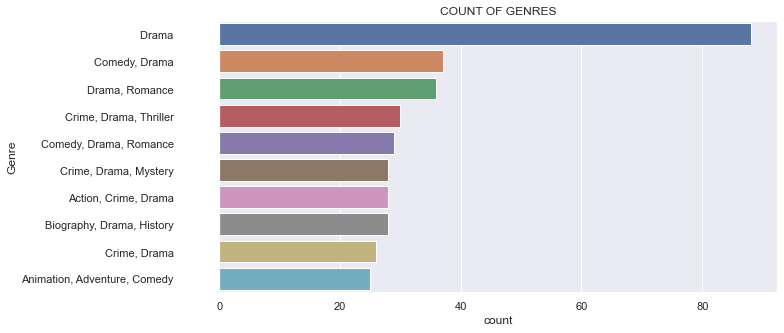

In [135]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(y="Genre", data=df,  order=df['Genre'].value_counts(ascending=False).index[0:10])
plt.title("COUNT OF GENRES")
plt.show()

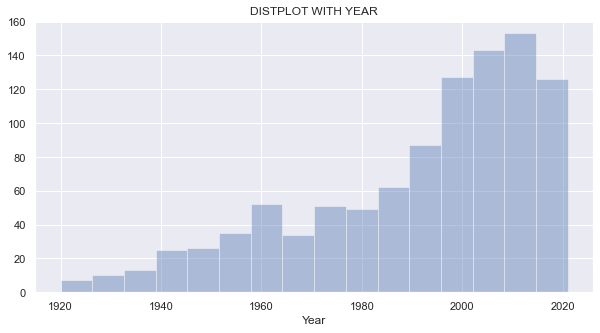

In [144]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.distplot(df["Year"], kde=False)
plt.title('DISTPLOT WITH YEAR')
plt.show()

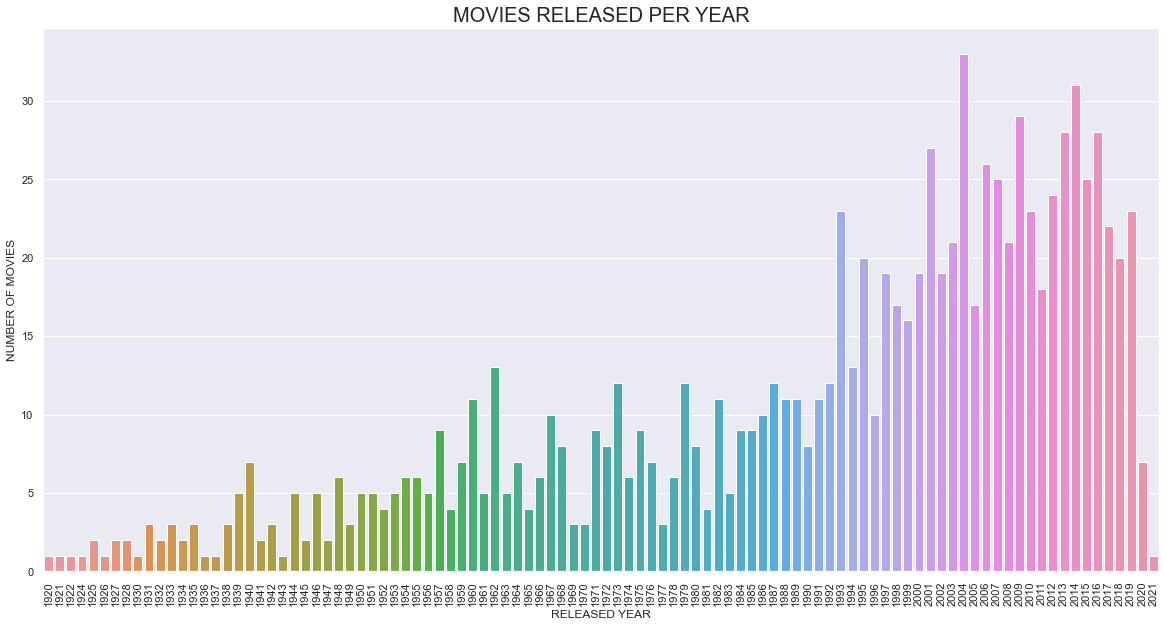

In [147]:
plt.figure(figsize=(20,10))
sns.countplot(df["Year"])
plt.title("MOVIES RELEASED PER YEAR",fontsize=20)
plt.xlabel("RELEASED YEAR")
plt.ylabel("NUMBER OF MOVIES")
plt.xticks(rotation=90)
plt.show()


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Movies released per year')

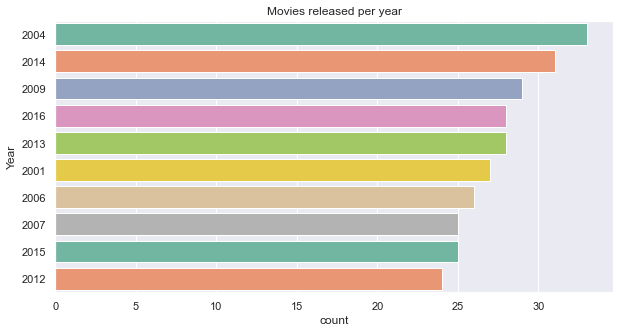

In [40]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(y="Year", data=df, palette="Set2", order=df['Year'].value_counts(ascending=False).index[0:10])
plt.title('Movies released per year')
plt.show()


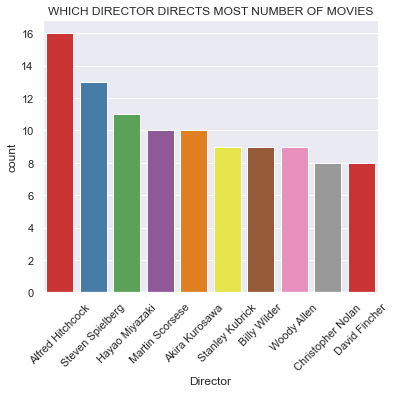

In [138]:
plt.figure(figsize=(6,5))
sns.countplot(x="Director",data=df,palette="Set1",  order=df['Director'].value_counts().index[0:10])
plt.xticks(rotation=45)
plt.title("WHICH DIRECTOR DIRECTS MOST NUMBER OF MOVIES")
plt.show()

<Figure size 432x360 with 0 Axes>

Text(0.5, 1.0, 'COUNT OF GROSS OF  MOVIES')

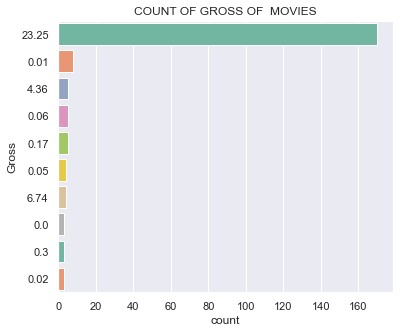

In [42]:
plt.figure(figsize=(6,5))
sns.set(style="darkgrid")
ax = sns.countplot(y="Gross", data=df, palette="Set2", order=df['Gross'].value_counts(ascending=False).index[0:10])
plt.title('COUNT OF GROSS OF  MOVIES')
plt.show()

## 02. BIVARIATE ANALYSIS

In [43]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


In [73]:
pd.crosstab(df["Run_time"],df["Year"]).mean()

Year
1920    0.007143
1921    0.007143
1922    0.007143
1924    0.007143
1925    0.014286
          ...   
2017    0.157143
2018    0.142857
2019    0.164286
2020    0.050000
2021    0.007143
Length: 100, dtype: float64

In [77]:
avg=df["Run_time"].groupby(df["Year"]).describe()

In [83]:
avg

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1920,1.0,76.000000,NaN,76.0,76.00,76.0,76.00,76.0
1921,1.0,68.000000,NaN,68.0,68.00,68.0,68.00,68.0
1922,1.0,94.000000,NaN,94.0,94.00,94.0,94.00,94.0
1924,1.0,45.000000,NaN,45.0,45.00,45.0,45.00,45.0
1925,2.0,85.000000,14.142136,75.0,80.00,85.0,90.00,95.0
...,...,...,...,...,...,...,...,...
2017,22.0,121.590909,20.129720,94.0,105.25,114.0,133.50,167.0
2018,20.0,130.200000,17.887367,101.0,118.75,132.0,138.25,170.0
2019,23.0,132.130435,26.654872,96.0,116.00,130.0,140.00,209.0


In [80]:
avg_runtime=avg["mean"]
avg_runtime_min=avg["mean"]-avg["std"]
avg_runtime_max=avg["mean"]+avg["std"]

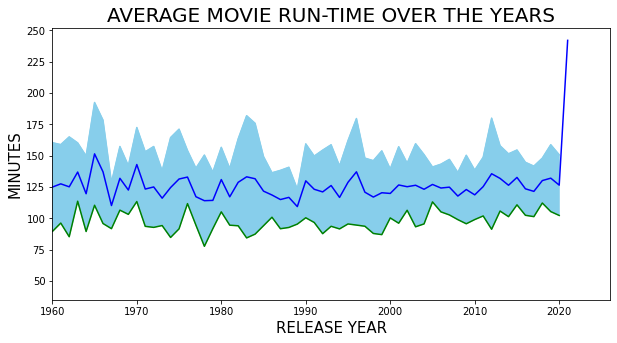

In [84]:
fig, x=plt.subplots(figsize=(10,5))
x.plot(avg_runtime,color='blue')
x.plot(avg_runtime_min,color='green')
x.plot(avg_runtime_max,color='skyblue')
x.fill_between(avg.index,avg_runtime_min,avg_runtime_max,color="skyblue")
x.set_title("AVERAGE MOVIE RUN-TIME OVER THE YEARS",fontsize=20)
x.set_xlabel("RELEASE YEAR",fontsize=15)
x.set_ylabel("MINUTES",fontsize=15)
x.set_xlim(1960)
plt.show()



In [85]:
movies_by_decades=df.copy()

In [91]:
movies_by_decades["Year"]=((movies_by_decades["Year"]//10)*10).astype("int64")

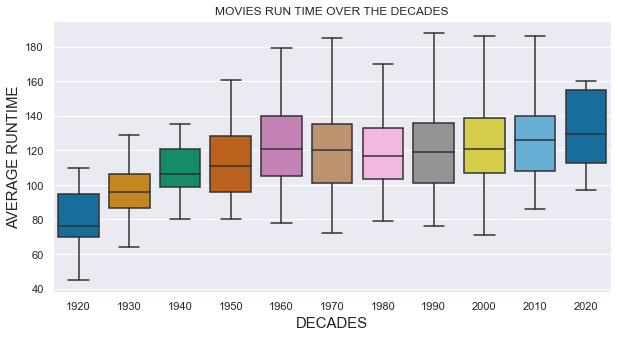

In [139]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Year",y="Run_time",data=movies_by_decades,palette ="colorblind",showfliers=False)
plt.title("MOVIES RUN TIME OVER THE DECADES")
plt.xlabel("DECADES",fontsize=15)
plt.ylabel("AVERAGE RUNTIME",fontsize=15)
plt.show()

In [90]:
movies_by_decades["Year"]

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Year, Length: 1000, dtype: int64

In [66]:
df.groupby(by=df["Year"])["Run_time"].mean()

Year
1920     76.000000
1921     68.000000
1922     94.000000
1924     45.000000
1925     85.000000
           ...    
2017    121.590909
2018    130.200000
2019    132.130435
2020    126.571429
2021    242.000000
Name: Run_time, Length: 100, dtype: float64

In [99]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80.0,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100.0,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


In [103]:
v=df.groupby(df["Year"])["Votes"].mean().reset_index()

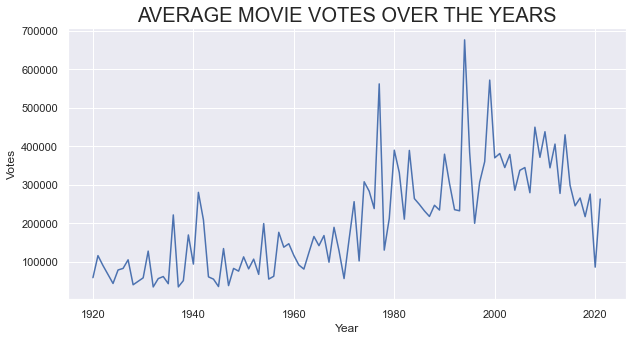

In [142]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Year",y="Votes",data=v)
plt.title("AVERAGE MOVIE VOTES OVER THE YEARS",fontsize=20)
plt.show()

In [128]:
df["Genre"]

0                         Drama            
1                  Crime, Drama            
2          Action, Crime, Drama            
3                  Crime, Drama            
4                  Crime, Drama            
                       ...                 
995      Comedy, Drama, Romance            
996              Drama, Western            
997         Drama, Romance, War            
998                  Drama, War            
999    Crime, Mystery, Thriller            
Name: Genre, Length: 1000, dtype: object

In [130]:
df.groupby(df["Genre"])["Year"].sum().sort_values()

Genre
Fantasy, Horror, Mystery                   1920
Fantasy, Horror                            1922
Adventure, Horror, Sci-Fi                  1933
Comedy, Musical, War                       1933
Comedy, Crime, Mystery                     1934
                                          ...  
Comedy, Drama, Romance                    57659
Crime, Drama, Thriller                    59884
Drama, Romance                            71804
Comedy, Drama                             73819
Drama                                    175463
Name: Year, Length: 202, dtype: int64

In [107]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80.0,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100.0,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


In [114]:
vot=df.groupby(df["Name"])["Votes"].max().sort_values()[-10:].reset_index()

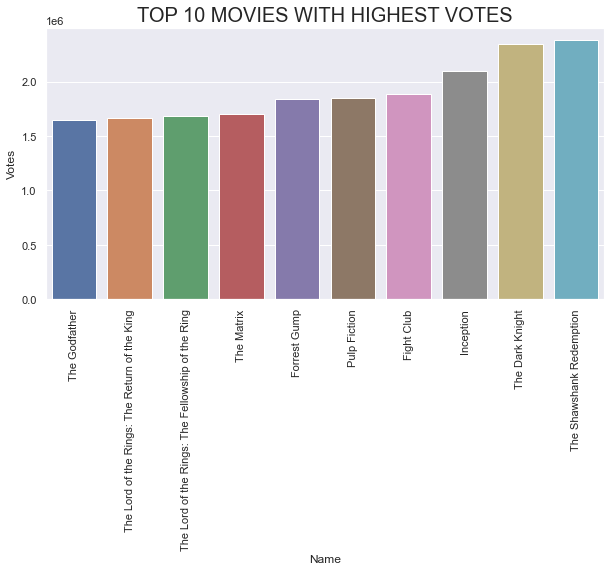

In [143]:
plt.figure(figsize=(10,5))
sns.barplot(x=vot["Name"],y=vot["Votes"])
plt.xticks(rotation=90)
plt.title("TOP 10 MOVIES WITH HIGHEST VOTES",fontsize=20)
plt.show()

<AxesSubplot:xlabel='Votes', ylabel='Rating'>

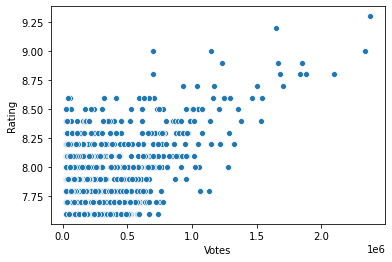

In [21]:
sns.scatterplot(y="Rating",x="Votes",data=df)

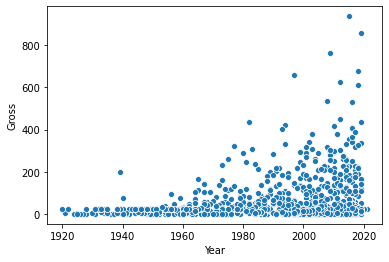

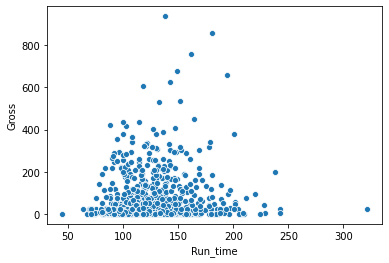

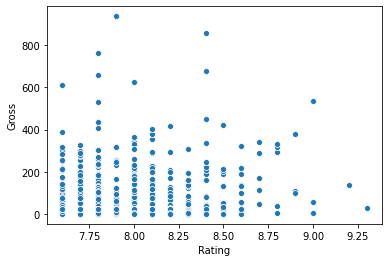

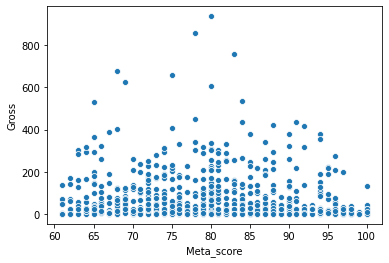

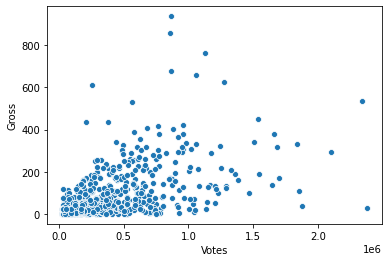

In [19]:
c=["Year","Run_time","Rating","Meta_score","Votes"]
#plt.figure(figsize=(15,7))
for a in c:
    sns.scatterplot(y="Gross",x=a,data=df)
   
    
    plt.show()
    

In [69]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='Name', ylabel='Gross'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'The Dark Knight Rises'),
  Text(1, 0, 'Rogue One'),
  Text(2, 0, 'The Dark Knight'),
  Text(3, 0, 'Incredibles 2'),
  Text(4, 0, 'The Avengers'),
  Text(5, 0, 'Titanic'),
  Text(6, 0, 'Avengers: Infinity War'),
  Text(7, 0, 'Avatar'),
  Text(8, 0, 'Avengers: Endgame'),
  Text(9, 0, 'Star Wars: Episode VII - The Force Awakens')])

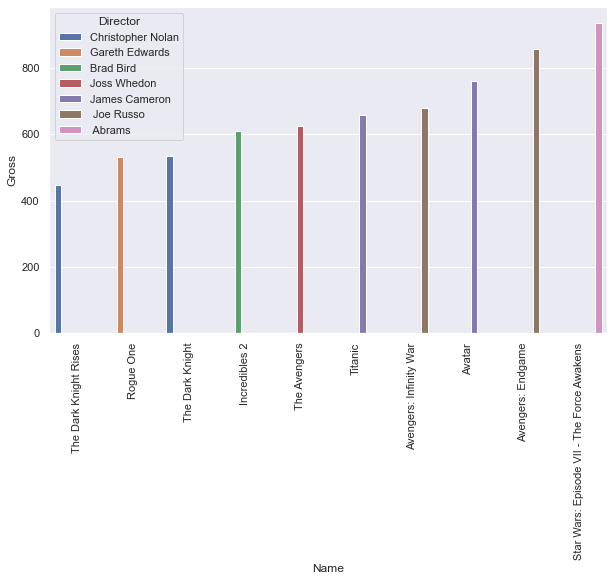

In [ ]:
sns

In [77]:
top_10_movies

,index,Name,Gross
0,64,The Dark Knight Rises,448.14
1,586,Rogue One,532.18
2,2,The Dark Knight,534.86
3,897,Incredibles 2,608.58
4,363,The Avengers,623.28
5,658,Titanic,659.33
6,61,Avengers: Infinity War,678.82
7,630,Avatar,760.51
8,60,Avengers: Endgame,858.37
9,480,Star Wars: Episode VII - The Force Awakens,936.66


In [20]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80.0,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100.0,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


In [47]:
bo=df[["Genre","Gross"]].sort_values("Gross")[-10:]

In [61]:
gross=df.groupby(df["Genre"])["Gross"].sum().sort_values()[-5:].reset_index()

In [62]:
gross

,Genre,Gross
0,"Action, Adventure, Fantasy",2139.60
1,Drama,2274.97
2,"Action, Adventure, Drama",2715.35
3,"Animation, Adventure, Comedy",4636.78
4,"Action, Adventure, Sci-Fi",5898.67


In [48]:
bo

,Genre,Gross
64,"Action, Adventure",448.14
586,"Action, Adventure, Sci-Fi",532.18
2,"Action, Crime, Drama",534.86
897,"Animation, Action, Adventure",608.58
363,"Action, Adventure, Sci-Fi",623.28
658,"Drama, Romance",659.33
61,"Action, Adventure, Sci-Fi",678.82
630,"Action, Adventure, Fantasy",760.51
60,"Action, Adventure, Drama",858.37
480,"Action, Adventure, Sci-Fi",936.66


<AxesSubplot:xlabel='Genre', ylabel='Gross'>

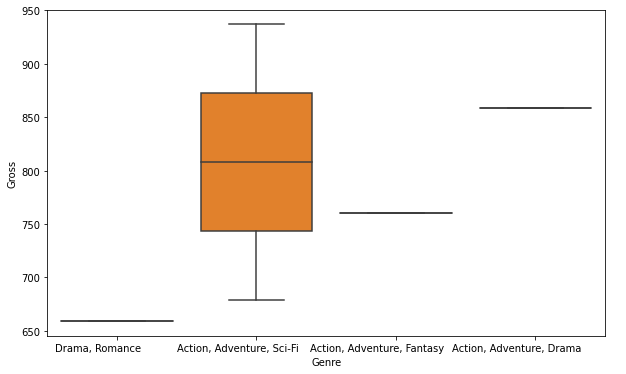

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Genre",y="Gross",data=bo)

<AxesSubplot:xlabel='Year'>

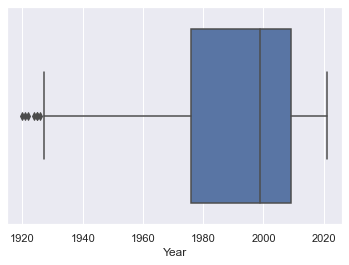

<AxesSubplot:xlabel='Run_time'>

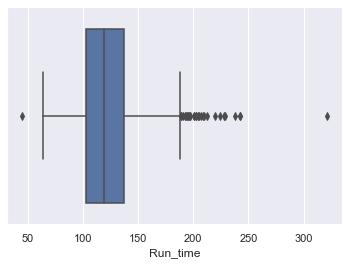

<AxesSubplot:xlabel='Rating'>

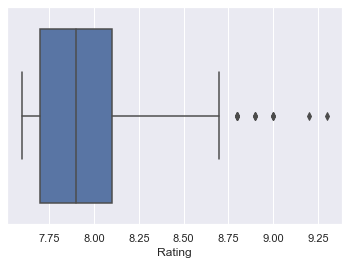

<AxesSubplot:xlabel='Meta_score'>

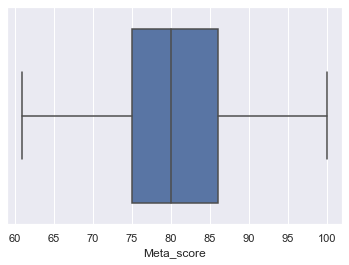

<AxesSubplot:xlabel='Votes'>

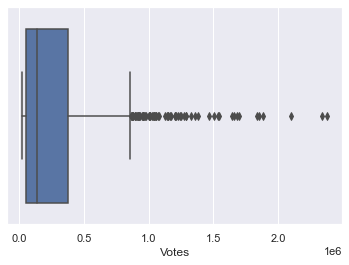

In [45]:
c=["Year","Run_time","Rating","Meta_score","Votes"]
#plt.figure(figsize=(15,7))
for a in c:
    sns.boxplot(x=a,data=df)
   
     
    plt.show()
    

In [46]:

#df.groupby(df["Genre"])["Rating"].min().sort_values(ascending=False).head(10).plot(kind="line")

#plt.xticks(rotation=90)

<AxesSubplot:xlabel='Genre'>

Text(0.5, 1.0, 'TOP 10 GENRES WITH HIGHEST RATING')

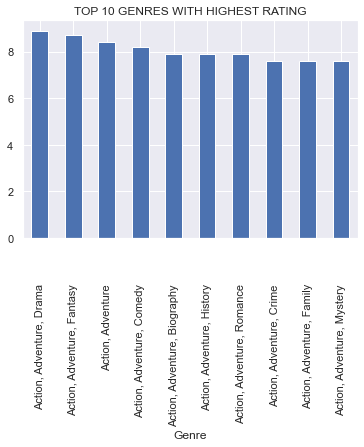

In [47]:
df.groupby(df["Genre"])["Rating"].max().head(10).sort_values(ascending=False).plot(kind="bar")
plt.title("TOP 10 GENRES WITH HIGHEST RATING")
plt.show()

In [48]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


In [49]:
dd = pd.DataFrame()
dd['cast'] = np.hstack([np.array(i.split(',')) for i in df.cast])



In [50]:
dd.head(3)

,cast
0,Tim Robbins
1,Morgan Freeman
2,Bob Gunton


In [51]:
xx=pd.DataFrame()
xx["gen"]=np.hstack([np.array(x.split(",")) for x in df.Genre])

In [52]:
xx["gen"]=xx["gen"].str.strip()

In [53]:
xx["gen"].value_counts()

Drama        723
Comedy       231
Crime        210
Adventure    195
Action       186
Thriller     140
Romance      124
Biography    107
Mystery       99
Animation     83
Fantasy       68
Sci-Fi        67
History       56
Family        54
War           51
Music         34
Horror        33
Western       20
Film-Noir     19
Sport         19
Musical       15
Name: gen, dtype: int64

<AxesSubplot:xlabel='gen', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Crime'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Thriller'),
  Text(6, 0, 'Romance'),
  Text(7, 0, 'Biography'),
  Text(8, 0, 'Mystery'),
  Text(9, 0, 'Animation')])

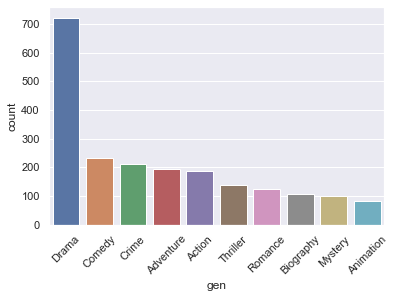

In [54]:
sns.countplot(x="gen",data=xx,order=xx["gen"].value_counts().index[0:10])
plt.xticks(rotation=45)
plt.show()

In [55]:
dd

,cast
0,Tim Robbins
1,Morgan Freeman
2,Bob Gunton
3,William Sadler
4,Marlon Brando
...,...
3995,William Bendix
3996,Robert Donat
3997,Madeleine Carroll
3998,Lucie Mannheim


In [56]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


In [57]:
dd["cast"].value_counts()

Tom Hanks           13
Robert De Niro      11
Al Pacino           10
Clint Eastwood      10
Humphrey Bogart      9
                    ..
John Getz            1
 Jacki Weaver        1
 Aaron Eckhart       1
 John Buckwalter     1
 Ian Hart            1
Name: cast, Length: 2961, dtype: int64

<AxesSubplot:xlabel='cast', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tom Hanks'),
  Text(1, 0, 'Robert De Niro'),
  Text(2, 0, 'Al Pacino'),
  Text(3, 0, 'Clint Eastwood'),
  Text(4, 0, 'Humphrey Bogart'),
  Text(5, 0, 'Leonardo DiCaprio'),
  Text(6, 0, 'James Stewart'),
  Text(7, 0, 'Christian Bale'),
  Text(8, 0, ' Brad Pitt'),
  Text(9, 0, 'Johnny Depp')])

Text(0.5, 1.0, 'NUMBER OF CAST APPEARED IN MOVIES')

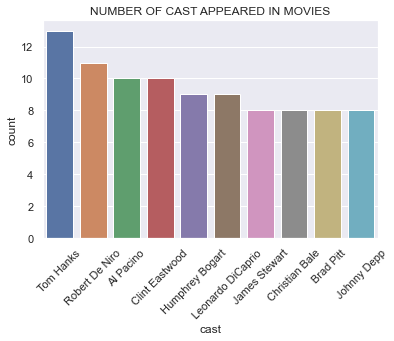

In [58]:
sns.countplot(x="cast",data=dd,order=dd["cast"].value_counts().index[0:10])
plt.xticks(rotation=45)
plt.title("NUMBER OF CAST APPEARED IN MOVIES")
plt.show()

In [59]:
import plotly.graph_objects as go


In [60]:
nam=df.groupby(df["Name"])["Gross"].max().sort_values(ascending=False).head(10).reset_index()

In [61]:
nam["Gross"]

0    936.66
1    858.37
2    760.51
3    678.82
4    659.33
5    623.28
6    608.58
7    534.86
8    532.18
9    448.14
Name: Gross, dtype: float64

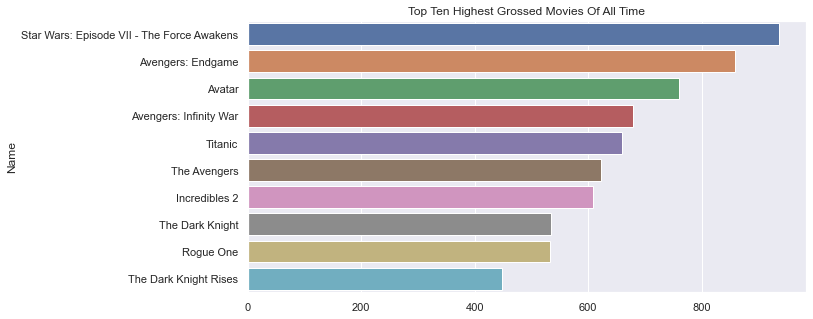

In [148]:
plt.figure(figsize=(10,5))

x=df.groupby(df["Name"])["Gross"].max().sort_values(ascending=False).head(10)
sns.barplot(x.values,x.index)
plt.title("Top Ten Highest Grossed Movies Of All Time")
plt.show()

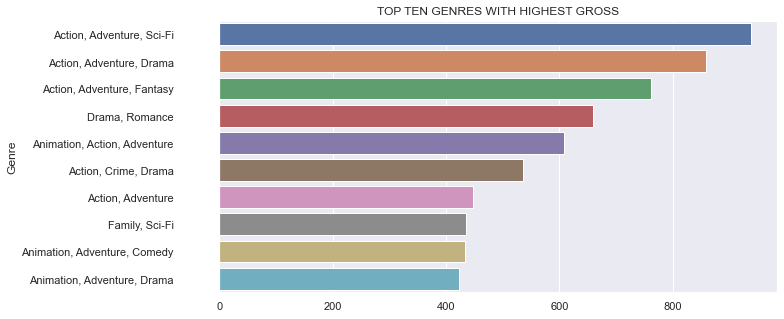

In [150]:
plt.figure(figsize=(10,5))
x=df.groupby(df["Genre"])["Gross"].max().sort_values(ascending=False).head(10)
sns.barplot(x.values,x.index)
plt.title("TOP TEN GENRES WITH HIGHEST GROSS")
plt.show()

In [65]:
df[df["Name"]=="Star Wars: Episode VII - The Force Awakens"]

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
480,Star Wars: Episode VII - The Force Awakens,2015,"Action, Adventure, Sci-Fi",138,7.9,80,868284,Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",936.66


Text(0.5, 1.0, 'DIRECTORS WHO HAVE DIRECTED THE TOP  GROSS MOVIES')

Text(0.5, 0, 'DIRECTORS')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Abrams'),
  Text(1, 0, ' Joe Russo'),
  Text(2, 0, 'James Cameron'),
  Text(3, 0, 'Joss Whedon'),
  Text(4, 0, 'Brad Bird'),
  Text(5, 0, 'Christopher Nolan'),
  Text(6, 0, 'Gareth Edwards'),
  Text(7, 0, 'Steven Spielberg'),
  Text(8, 0, 'Josh Cooley'),
  Text(9, 0, ' Rob Minkoff')])

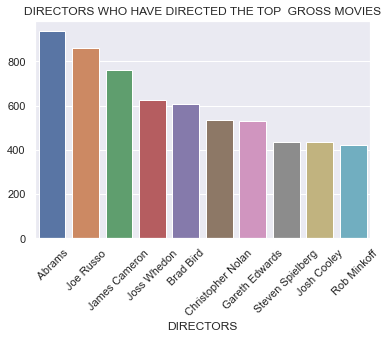

In [66]:
x=df.groupby(by=df["Director"])["Gross"].max().sort_values(ascending=False).head(10)
plt.title("DIRECTORS WHO HAVE DIRECTED THE TOP  GROSS MOVIES")
y=sns.barplot(x.index,x.values)
y.set_xlabel("DIRECTORS")
plt.xticks(rotation=45)
plt.show()

In [67]:
df.groupby(df["cast"])["Gross"].max().sort_values(ascending=False).head(5)
# casts that were appeared in the movies which grossed the highest

cast
Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson              936.66
Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth         858.37
Sam Worthington, Zoe Saldana, Sigourney Weaver, Michelle Rodriguez    760.51
Robert Downey Jr., Chris Hemsworth, Mark Ruffalo, Chris Evans         678.82
Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates              659.33
Name: Gross, dtype: float64

## 03. Multi-Variate Analysis:

<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

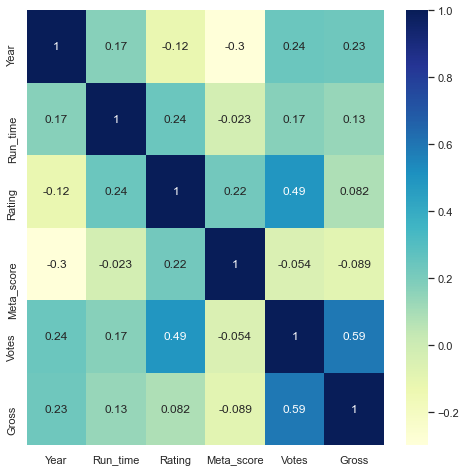

In [68]:
plt.figure(figsize=[8,8])
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')

In [105]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


In [152]:
top_10_movies=df[["Name","Gross"]].sort_values("Gross")[-10:].reset_index()

In [153]:
xx=df[["Name","Gross","Director"]].sort_values("Gross")[-10:].reset_index()

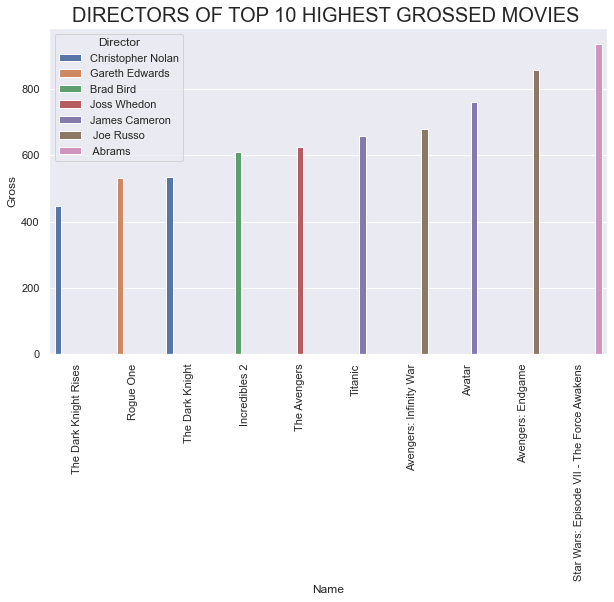

In [155]:
plt.figure(figsize=(10,6))
sns.barplot(x="Name",y="Gross",hue="Director",data=xx)
plt.title("DIRECTORS OF TOP 10 HIGHEST GROSSED MOVIES ",fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [108]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


In [170]:
vt=df[["Name","Votes","Gross"]].sort_values("Votes")[-10:]

In [171]:
vt

,Name,Votes,Gross
1,The Godfather,1646818,134.97
5,The Lord of the Rings: The Return of the King,1663902,377.85
10,The Lord of the Rings: The Fellowship of the Ring,1683989,315.54
14,The Matrix,1700513,171.48
11,Forrest Gump,1838908,330.25
6,Pulp Fiction,1852195,107.93
9,Fight Club,1881336,37.03
8,Inception,2099854,292.58
2,The Dark Knight,2341261,534.86
0,The Shawshank Redemption,2377480,28.34


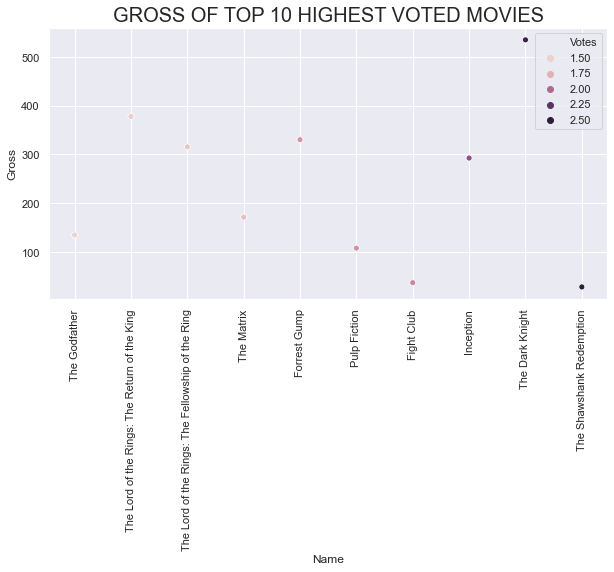

In [177]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Name",hue="Votes",y="Gross",data=vt)
plt.title("GROSS OF TOP 10 HIGHEST VOTED MOVIES",fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [182]:
bb=df[["Name","Rating","Gross"]].sort_values("Rating").reset_index()[-10:]

In [183]:
bb

,index,Name,Rating,Gross
990,12,"Il buono, il brutto, il cattivo",8.8,6.10
991,10,The Lord of the Rings: The Fellowship of the Ring,8.8,315.54
992,7,Schindler's List,8.9,96.90
993,6,Pulp Fiction,8.9,107.93
994,5,The Lord of the Rings: The Return of the King,8.9,377.85
995,4,12 Angry Men,9.0,4.36
996,3,The Godfather: Part II,9.0,57.30
997,2,The Dark Knight,9.0,534.86
998,1,The Godfather,9.2,134.97
999,0,The Shawshank Redemption,9.3,28.34


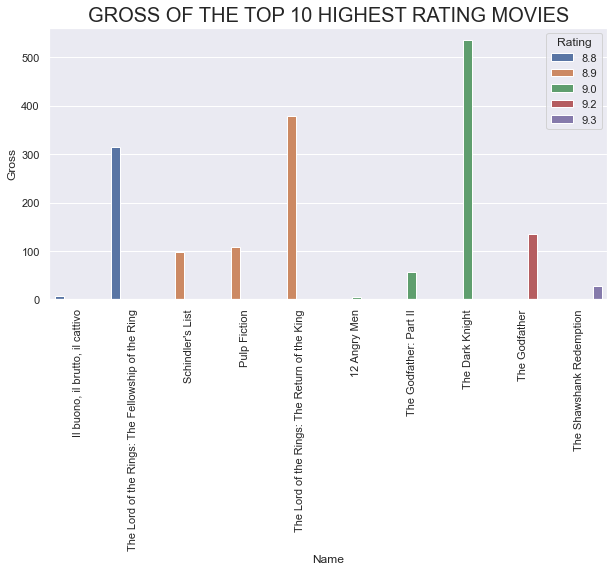

In [186]:
plt.figure(figsize=(10,5))
sns.barplot(x="Name",y="Gross",hue="Rating",data=bb)
plt.title("GROSS OF THE TOP 10 HIGHEST RATING MOVIES",fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [18]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80.0,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100.0,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


In [178]:
cc=df[["Name","Meta_score","Gross"]].sort_values("Meta_score").reset_index()[-10:]

In [179]:
cc

,index,Name,Meta_score,Gross
990,1,The Godfather,100.0,134.97
991,445,Sweet Smell of Success,100.0,23.25
992,115,Lawrence of Arabia,100.0,44.82
993,81,Rear Window,100.0,36.76
994,264,Trois couleurs: Rouge,100.0,4.04
995,563,Notorious,100.0,10.46
996,279,Fanny och Alexander,100.0,4.97
997,118,Vertigo,100.0,3.20
998,493,Boyhood,100.0,25.38
999,50,Casablanca,100.0,1.02


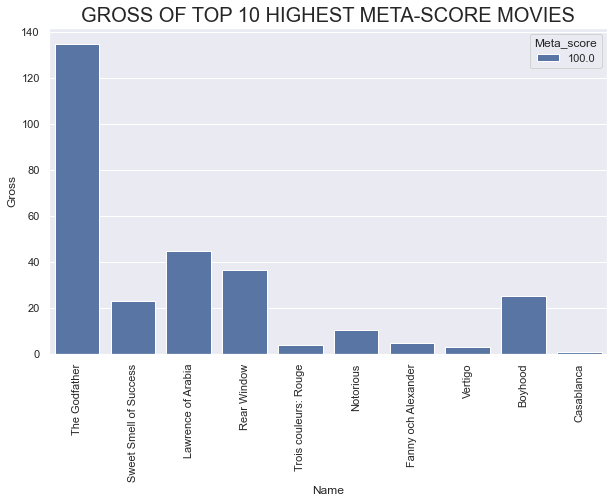

In [181]:
plt.figure(figsize=(10,6))
sns.barplot(x="Name",y="Gross",hue="Meta_score",data=cc)
plt.title("GROSS OF TOP 10 HIGHEST META-SCORE MOVIES",fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [188]:
df.head(2)

,Name,Year,Genre,Run_time,Rating,Meta_score,Votes,Director,cast,Gross
0,The Shawshank Redemption,1994,Drama,142,9.3,80.0,2377480,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",28.34
1,The Godfather,1972,"Crime, Drama",175,9.2,100.0,1646818,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",134.97


In [189]:
e=df[["Name","cast","Gross"]].sort_values("Gross").reset_index()[-10:]

In [190]:
e

,index,Name,cast,Gross
990,64,The Dark Knight Rises,"Christian Bale, Tom Hardy, Anne Hathaway, Gary...",448.14
991,586,Rogue One,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",532.18
992,2,The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86
993,897,Incredibles 2,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H...",608.58
994,363,The Avengers,"Robert Downey Jr., Chris Evans, Scarlett Johan...",623.28
995,658,Titanic,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",659.33
996,61,Avengers: Infinity War,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",678.82
997,630,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",760.51
998,60,Avengers: Endgame,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",858.37
999,480,Star Wars: Episode VII - The Force Awakens,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",936.66


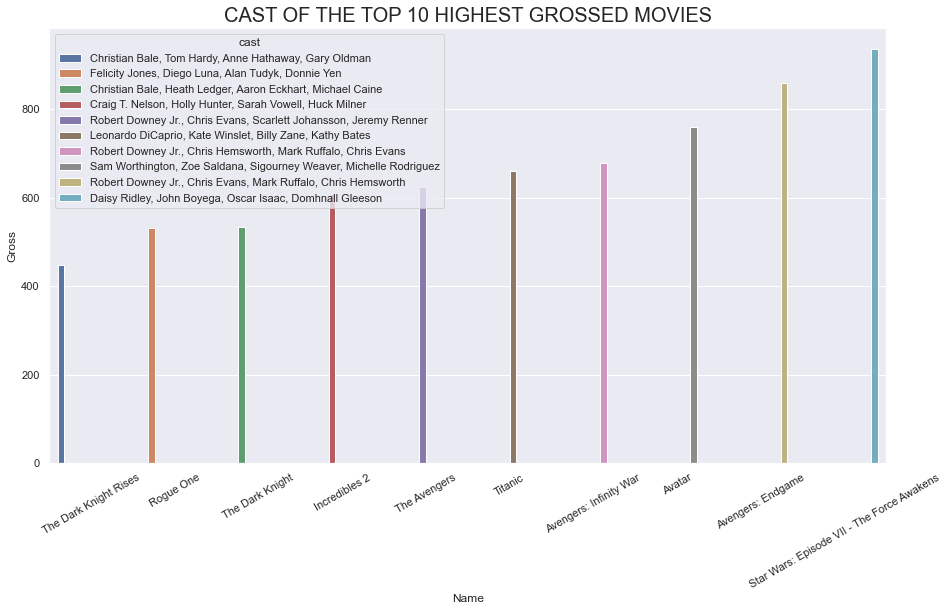

In [202]:
plt.figure(figsize=(15,8))
sns.barplot(x="Name",y="Gross",hue="cast",data=e)
plt.title("CAST OF THE TOP 10 HIGHEST GROSSED MOVIES",fontsize=20)
plt.xticks(rotation=30)
plt.show()